In [48]:
# !unzip /content/drive-download-20240309T162137Z-001.zip

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install catboost
from catboost import CatBoostRanker, Pool, MetricVisualizer
from copy import deepcopy
import os

from sklearn.metrics import ndcg_score

import warnings
warnings.filterwarnings("ignore")

# from google.colab import files
# uploaded = files.upload()

In [50]:
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')

In [51]:
df_sum = train_df.groupby('search_id')['target'].sum().reset_index()
to_remove = set(df_sum[df_sum['target'] == 0]['search_id'].to_list())
print(len(to_remove))
train_non_zeros = train_df[~train_df['search_id'].isin(to_remove)]
train_non_zeros

787


,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
47,2545,9,0,0,1,20,4,41,0,0,...,0.240638,0.161402,0.038839,0,0,0,0.20751,0.0,0.0,0
48,2545,9,0,0,1,20,4,41,0,0,...,0.155603,0.177651,0.027643,0,0,0,0.45000,0.0,0.0,0
49,2545,9,0,0,1,20,4,41,0,0,...,0.257623,0.096928,0.024971,0,0,0,0.10866,0.0,0.0,0
50,2545,9,0,0,1,20,4,41,0,0,...,0.268424,0.159566,0.042831,0,0,0,0.00000,0.0,0.0,0
51,2545,9,0,0,1,20,4,41,0,0,...,0.242139,0.152171,0.036846,0,0,0,0.10866,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,494693,9,0,0,0,9,4,38,6,6,...,0.309672,0.921060,0.285226,0,0,0,0.98807,0.0,0.0,0
15077,494693,9,0,0,0,9,4,38,6,6,...,0.303805,0.995086,0.302312,0,0,0,0.87146,0.0,0.0,0
15078,494693,9,0,0,0,9,4,38,6,6,...,0.346538,0.993070,0.344137,0,0,0,0.49999,0.0,0.0,0
15079,494693,9,0,0,0,9,4,38,6,6,...,0.243154,0.994833,0.241898,0,0,0,0.67614,0.0,0.0,0


In [52]:
train_non_zeros.groupby('search_id')['target'].sum()

search_id
2545      1
2863      1
8331      2
9324      1
19241     1
         ..
491833    1
493548    1
493873    1
494693    1
496362    2
Name: target, Length: 213, dtype: int64

In [53]:
train_df

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,758,9,0,0,1,20,3,40,0,3,...,0.204682,0.271755,0.055623,0,0,0,0.38648,0.0,0.0,0
1,758,9,0,0,1,20,3,40,0,3,...,0.195531,0.188787,0.036914,0,0,0,0.10982,0.0,0.0,0
2,758,9,0,0,1,20,3,40,0,3,...,0.148609,0.186517,0.027718,0,0,0,0.03674,0.0,0.0,0
3,758,9,0,0,1,20,3,40,0,3,...,0.223748,0.229039,0.051247,0,0,0,0.00000,0.0,0.0,0
4,758,9,0,0,1,20,3,40,0,3,...,0.170935,0.249031,0.042568,0,0,0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,494693,9,0,0,0,9,4,38,6,6,...,0.309672,0.921060,0.285226,0,0,0,0.98807,0.0,0.0,0
15077,494693,9,0,0,0,9,4,38,6,6,...,0.303805,0.995086,0.302312,0,0,0,0.87146,0.0,0.0,0
15078,494693,9,0,0,0,9,4,38,6,6,...,0.346538,0.993070,0.344137,0,0,0,0.49999,0.0,0.0,0
15079,494693,9,0,0,0,9,4,38,6,6,...,0.243154,0.994833,0.241898,0,0,0,0.67614,0.0,0.0,0


In [54]:
train_df.groupby('target')['target'].count()

target
0    14759
1      322
Name: target, dtype: int64

In [55]:
322 / 14759 + 322

322.02181719628703

In [56]:
test_df

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,10655,9,0,0,1,20,4,40,0,0,...,0.148830,0.196644,0.029267,0,0,0,0.03674,0.0,0.0,0
1,10655,9,0,0,1,20,4,40,0,0,...,0.119724,0.174199,0.020856,0,0,0,0.00000,0.0,0.0,0
2,10655,9,0,0,1,20,4,40,0,0,...,0.160606,0.198780,0.031925,0,0,0,0.00000,0.0,0.0,0
3,10655,9,0,0,1,20,4,40,0,0,...,0.180191,0.187882,0.033855,0,0,0,0.00000,0.0,0.0,0
4,10655,9,0,0,1,20,4,40,0,0,...,0.117308,0.153586,0.018017,0,0,0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,493078,9,0,0,0,9,4,35,0,0,...,0.341683,0.067348,0.023012,0,0,0,0.46108,0.0,0.0,0
1525,493078,9,0,0,0,9,4,35,0,0,...,0.270293,0.049000,0.013244,0,0,0,0.03674,0.0,0.0,0
1526,493078,9,0,0,0,9,4,35,0,0,...,0.372268,0.069882,0.026015,0,0,0,0.14540,0.0,0.0,1
1527,493078,9,0,0,0,9,4,35,0,0,...,0.355755,0.077469,0.027560,0,0,0,0.21288,0.0,0.0,1


In [57]:
train_df['search_id'].unique().__len__()

1000

In [58]:
hist = train_df.groupby('search_id')['search_id'].count()
hist

search_id
116       16
758       16
1569      13
1899      18
2545      17
          ..
494425     3
494693    18
495183    17
496362    16
496975    18
Name: search_id, Length: 1000, dtype: int64

(array([  9.,   6.,  16.,  43.,  16.,  22.,   9.,  14.,  19.,  17.,  20.,
         21.,  41.,  62.,  52., 126.,  68., 232.,  29., 178.]),
 array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
         9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
        18.1 , 19.05, 20.  ]),
 <BarContainer object of 20 artists>)

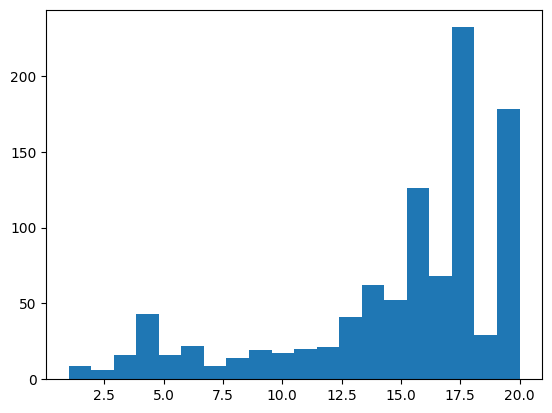

In [59]:
plt.hist(hist, bins=20)

In [60]:
set(train_df['search_id'].unique()) & set(test_df['search_id'].unique())

set()

Исходя из всего анализа выше:
Тут очень несбалансированный датасет, так как в среднем на группу приходиться по 1-2 примерам с положительным классом. Дисбаланс 322 к 1.


In [61]:
X_train = train_df.drop(['search_id', 'target'] , axis=1).values
y_train = train_df['target'].values
group_id_train = train_df['search_id'].values

X_test = test_df.drop(['search_id', 'target' ], axis=1).values
y_test = test_df['target'].values
group_id_test = test_df['search_id'].values

### Катбуст хорошо работает с категориальными фичами, поэтому попробуем задетектить

Попробуем взять 19 и 34 первых как категориальные, так как там уникальных значений относительно немного

[('feature_0', 1), ('feature_73', 1), ('feature_74', 1), ('feature_75', 1), ('feature_3', 2), ('feature_4', 2), ('feature_9', 2), ('feature_10', 2), ('feature_11', 2), ('feature_12', 2), ('feature_13', 2), ('feature_14', 2), ('feature_15', 2), ('feature_1', 4), ('feature_5', 6), ('feature_2', 7), ('feature_7', 8), ('feature_8', 8), ('feature_61', 10), ('feature_6', 33), ('feature_23', 39), ('feature_19', 42), ('feature_22', 50), ('feature_20', 51), ('feature_21', 56), ('feature_16', 65), ('feature_18', 74), ('feature_43', 80), ('feature_60', 81), ('feature_52', 88), ('feature_44', 92), ('feature_17', 98), ('feature_36', 134), ('feature_59', 134), ('feature_35', 363), ('feature_38', 480), ('feature_33', 536), ('feature_32', 669), ('feature_31', 684), ('feature_30', 691), ('feature_34', 691), ('feature_37', 699), ('feature_26', 704), ('feature_27', 707), ('feature_28', 708), ('feature_29', 710), ('feature_25', 723), ('feature_24', 777), ('feature_57', 931), ('feature_76', 1016), ('featur

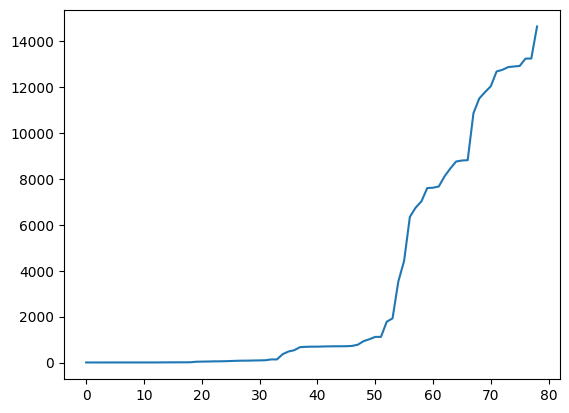

In [62]:
feature2num_classes = {}
for col in train_df.drop(['search_id', 'target'], axis=1).columns:
    feature2num_classes[col] = len(train_df.groupby(col)[col])

features_values = list(sorted(feature2num_classes.items(), key=lambda x: x[1]))
print(features_values)

plt.plot([elem[1] for elem in features_values])

In [63]:
cat_features_19 = [int(elem[0].split('_')[1]) for elem in features_values[:19]]
cat_features_34 = [int(elem[0].split('_')[1]) for elem in features_values[:34]]

cat_features_19

[0, 73, 74, 75, 3, 4, 9, 10, 11, 12, 13, 14, 15, 1, 5, 2, 7, 8, 61]

In [64]:
X_train = train_non_zeros.drop(['search_id', 'target'] , axis=1).values
y_train = train_non_zeros['target'].values
group_id_train = train_non_zeros['search_id'].values

train_pool = Pool(
    data= X_train,
    label= y_train,
    group_id= group_id_train,
    # cat_features=cat_features_19
)

test_pool = Pool(
    data= X_test,
    label= y_test,
    group_id= group_id_test,
    # cat_features=cat_features_19
)

к сожалению, идея с категориальными признаками так же как и остальные способы буста не дала

In [65]:
from catboost import CatBoostClassifier, CatBoostRegressor, CatBoostRanker


parameters = {
    'iterations': 2000,
    'learning_rate': 1e-2,
    'depth': 6,
    # 'loss_function': 'YetiRankPairwise',
    # 'cat_features': cat_features_19,
    'class_weights': {
        0: 1,
        1: 10
    },

    'custom_metric': ['NDCG', 'PFound', 'PrecisionAt:top=5', 'RecallAt:top=5'],

    'verbose': False,
    'random_seed': 42,
}

model = CatBoostClassifier(**parameters)

model.fit(
    train_pool,
    eval_set=test_pool,
    silent=True,
    use_best_model=True,
    plot=True
)

preds = model.predict(X_test)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [66]:
model.best_score_

{'learn': {'PrecisionAt:top=5;use_weights=false': 0.31118935837245776,
  'Logloss': 0.12838897443969544,
  'RecallAt:top=5;use_weights=true': 1.0,
  'PrecisionAt:top=5;use_weights=true': 0.31118935837245776,
  'RecallAt:top=5;use_weights=false': 1.0},
 'validation': {'RecallAt:top=5;use_weights=false': 0.95,
  'RecallAt:top=5;use_weights=true': 0.95,
  'NDCG:use_weights=false;type=Base': 0.9282776818178459,
  'PFound:use_weights=true': 0.1813777233016104,
  'Logloss': 0.4480012309539276,
  'PFound:use_weights=false': 0.1813777233016104,
  'PrecisionAt:top=5;use_weights=true': 0.059500000000000025,
  'NDCG:use_weights=true;type=Base': 0.9282776818178459,
  'PrecisionAt:top=5;use_weights=false': 0.059500000000000025}}

Итого видим: NDCG = 0.93 , recall =0.95 , но при этом Precision очень мал = 0.06
Причина- сильный дисбаланс, даже веса не помогли. Модель переобучается на 0.